Text(0, 0.5, 'f(x)')

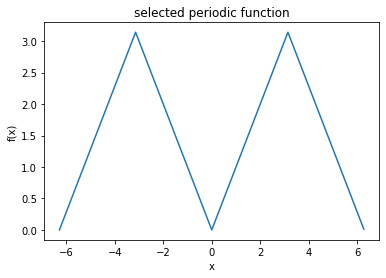

In [12]:
from scipy import fftpack,signal
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# generate input signal
N = 1000
x = np.linspace(-2*np.pi, 2*np.pi, N, endpoint=False)
period = 2 * np.pi
period_count = round((max(x)-min(x))/period)
#Input = signal.square(2*np.pi/period * x)
Input = 0.5 * np.pi* signal.sawtooth(2 * np.pi * 1/2/np.pi * x, 0.5) + 0.5 * np.pi

plt.plot(x, Input)
plt.title("selected periodic function")
plt.xlabel("x")
plt.ylabel("f(x)")
                   

#plt.show()

In [15]:
int(N/period_count)

500

In [20]:
sum(Input[:int(N/period_count)])/period_count

392.6990816987243

In [21]:
# Define fourier series function 
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
#intergation
def f(x,n):
    return  Input[x] * np.cos(2 * np.pi * n * x)

def A0():
    return sum(Input[:int(N/period_count)])/int(N/period_count)
"""
def An(n):
    
    #An = np.zeros(n)
    #for i in range(1, n+1):
    #    An[i-1], err = integrate.quad(f, 0, period, args = (i)
    #return 2/period* An
    
    return np.zeros(n)

def Bn(n):
    Bn = []
    for i in range(1,n+1):
        Bn.append(2/(np.pi * i)*(1 - np.cos(i * np.pi)))
    return Bn
"""
def An(n):
    An = []
    for i in range(1,n+1): 
        An.append(2/(i ** 2 * np.pi)*((-1)** i - 1))
    return An
def Bn(n):
    return np.zeros(n)
print(A0(),An(3)[0],Bn(3))


1.5707963267948972 -1.2732395447351628 [0. 0. 0.]


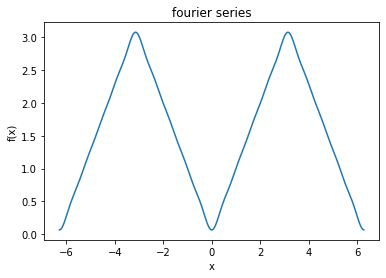

Fourier series(standed)
a0:  1.5707963267948972 
an:  [-1.2732395447351628, 0.0, -0.1414710605261292, 0.0, -0.05092958178940651, 0.0, -0.02598448050479924, 0.0, -0.015719006725125467, 0.0] 
bn:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [81]:
def fourier(x, order, a0, an, bn):
    series = a0
    for n in range(1,order+1):
        #series = series + An(order)[n-1] * np.cos(n * x) + Bn(order)[n-1] * np.sin(n * x)
        series = series + an[n-1] * np.cos(2 * np.pi * n / period * x) + bn[n-1] * np.sin(2 * np.pi * n / period * x)
    #print(A0())    
    #print(An(order))
    #print(Bn(order))
    return series
order = 10
series = fourier(x, order, A0(), An(order), Bn(order))
plt.plot(x, series)
plt.title('fourier series')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()
print("Fourier series(standed)")
print("a0: ",A0(),"\nan: ",An(order),"\nbn: ",Bn(order)) 

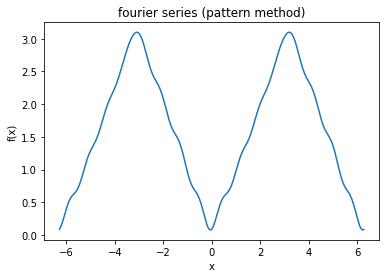

MSE:  0.0029494940445814423
Fourier series(Gradient descent)
a0:  1.5891956477275115 
an:  [-1.28061491e+00  2.34547243e-02 -1.30495797e-01  1.23716766e-02
 -4.73475079e-02  2.43566269e-04 -4.33312050e-02 -3.42706753e-02] 
bn:  [-0.0245093   0.02526341  0.01397952  0.01438353  0.00817025  0.00627159
  0.00795242  0.02303597]


In [95]:
########################(b) pattern learning
# find parameter

def Gradient_descent(Input, learning_rate, order): 
    a0 = 3
    an = 0.5*np.ones(order) 
    bn = 0.5*np.ones(order)
    #record = []
    for i in range(0, np.size(x)):
        series = fourier(x, order, a0, an, bn)
        a0 = a0 + learning_rate*(Input[i] - series[i])
        for k in range(0,order):          
            an[k] = an[k] + learning_rate *(Input[i] - series[i])* np.cos((k+1)*x[i])
            bn[k] = bn[k] + learning_rate *(Input[i] - series[i])* np.sin((k+1)*x[i])
        
    return a0, an, bn

order = 8

a0, an, bn  = Gradient_descent(Input, 0.01, order)
pattern_series = fourier(x, order, a0, an, bn)
# plot
plt.plot(x, pattern_series)
plt.title('fourier series (pattern method)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

MSE = mean_squared_error(Input,pattern_series)
print("MSE: ",MSE)
print("Fourier series(Gradient descent)")
print("a0: ",a0,"\nan: ",an,"\nbn: ",bn) 


1 MSE:  0.023387976649214225
2 MSE:  0.01657821900448433
3 MSE:  0.005858696043602515
4 MSE:  0.00445694454506925
5 MSE:  0.0033916109959110153
6 MSE:  0.003007477769363376
7 MSE:  0.002947012493297059
8 MSE:  0.0029494940445814423
9 MSE:  0.003170453420551516
10 MSE:  0.0033893813669766235
11 MSE:  0.0037602124963813754
12 MSE:  0.004130536079102278
13 MSE:  0.004613095357659885
14 MSE:  0.005104596541854344
15 MSE:  0.005684243086506797
16 MSE:  0.006281625328730283
17 MSE:  0.0069522536177683706
18 MSE:  0.00764787623372585
19 MSE:  0.008407532438003028


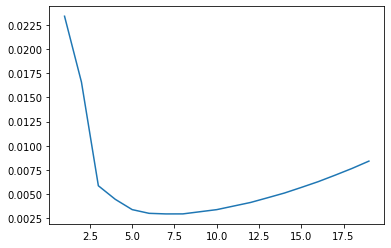

In [94]:
# (c) Order vs MSE
mse_record = []
for i in range(1,20):
    a0_c, an_c,bn_c  = Gradient_descent(Input, 0.01, i)
    pattern_series_c = fourier(x, i, a0_c, an_c, bn_c)
    mse_record.append(mean_squared_error(Input,pattern_series_c))
    print(i,"MSE: ",mean_squared_error(Input,pattern_series_c))
plt.plot(range(1,20,1),mse_record)
plt.xlabel("Order")
plt.ylabel("MSE")
plt.show()


1 MSE:  2.915906102050542
2 MSE:  1.5823674877346938
3 MSE:  0.8850291447979214
4 MSE:  0.5057709255733265
5 MSE:  0.2936649587831992
6 MSE:  0.17269123112867737
7 MSE:  0.10278016149624648
8 MSE:  0.06205426006012527
9 MSE:  0.038232494426926805
10 MSE:  0.024270391474103255
11 MSE:  0.016063455765024073
12 MSE:  0.011198183404172496
13 MSE:  0.008253521927556058
14 MSE:  0.006400298972684335
15 MSE:  0.005166328896984964
16 MSE:  0.004295933973988067
17 MSE:  0.003664506539388788
18 MSE:  0.003225838212127361
19 MSE:  0.0029793328873298857
20 MSE:  0.0029494940445814423
21 MSE:  0.0031731023981132977
22 MSE:  0.003691271123412678
23 MSE:  0.004544623122821404
24 MSE:  0.005770477655001342
25 MSE:  0.007401331505890111
26 MSE:  0.00946417022396113
27 MSE:  0.011980304919344544
28 MSE:  0.014965533802580026
29 MSE:  0.018430495671316827


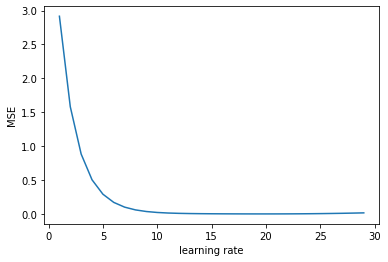

In [101]:
# (d) learning rate vs MSE
mse_record = []
order = 8
for i in range(1,30):
    a0_d, an_d,bn_d  = Gradient_descent(Input, 0.0005 * i, order)
    pattern_series_d = fourier(x, order, a0_d, an_d, bn_d)
    mse_record.append(mean_squared_error(Input,pattern_series_d))
    print(i,"MSE: ",mean_squared_error(Input,pattern_series_d))
plt.plot(range(1,30,1),mse_record)
plt.xlabel("learning rate")
plt.ylabel("MSE")
plt.show()

In [ ]:
# (e) batch learning vs pattern learning
def Gradient_descent_batch(Input, learning_rate, order,batch_size): 
    a0 = 3
    an = 0.5*np.ones(order) 
    bn = 0.5*np.ones(order)
    #record = []
    for i in range(0, np.size(x) - batch_size, batch_size):
        series = fourier(x, order, a0, an, bn)
        a0 = a0 + learning_rate*(sum(Input[i:i+batch_size]) - sum(series[i:i+batch_size]))
        for k in range(0,order):
            an[k] = an[k] + learning_rate *(sum(Input[i:i+batch_size]) - sum(series[i:i+batch_size]))* np.cos((k+1)*x[i])
            bn[k] = bn[k] + learning_rate *(sum(Input[i:i+batch_size]) - sum(series[i:i+batch_size]))* np.sin((k+1)*x[i])
        
    return a0, an, bn

In [110]:
for i in range(0,10,3):
    print(i)

0
3
6
9


In [2]:
from symfit import parameters, variables, sin, cos, Fit
import numpy as np
import matplotlib.pyplot as plt

x, y = variables('x, y')
w, = parameters('w')
n=3
"""
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param x: Independent variable
    :param f: Frequency of the fourier series
"""
# Make the parameter objects for all the terms
a0, *cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, n + 1)]))
sin_b = parameters(','.join(['b{}'.format(i) for i in range(1, n + 1)]))
# Construct the series
series = a0 + sum(ai * cos(i * w * x) + bi * sin(i * w * x)
                for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))

model_dict = {y: series}

print(model_dict)

{y: a0 + a1*cos(w*x) + a2*cos(2*w*x) + a3*cos(3*w*x) + b1*sin(w*x) + b2*sin(2*w*x) + b3*sin(3*w*x)}


In [3]:
from symfit import parameters, variables, sin, cos, Fit
import numpy as np
import math
import matplotlib.pyplot as plt

def fourier_series(x, f, n=0):
    """
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param x: Independent variable
    :param f: Frequency of the fourier series
    """
    # Make the parameter objects for all the terms
    a0, *cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, n + 1)]))
    sin_b = parameters(','.join(['b{}'.format(i) for i in range(1, n + 1)]))
    # Construct the series
    series = a0 + sum(ai * cos(i * f * x) + bi * sin(i * f * x)
                    for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))
    return series

x, y = variables('x, y')
w, = parameters('w')
model_dict = {y: fourier_series(x, f=w, n=3)}
print(model_dict)

{y: a0 + a1*cos(w*x) + a2*cos(2*w*x) + a3*cos(3*w*x) + b1*sin(w*x) + b2*sin(2*w*x) + b3*sin(3*w*x)}



Parameter Value        Standard Deviation
a0        5.000000e-01 2.075395e-02
a1        5.734902e-12 3.277426e-02
a2        6.124943e-12 3.197889e-02
a3        3.243909e-12 3.080979e-02
b1        6.267589e-01 2.548585e-02
b2        1.986491e-02 2.643438e-02
b3        1.846406e-01 2.756060e-02
w         8.671471e-01 3.356602e-02
Status message         Optimization terminated successfully.
Number of iterations   25
Objective              <symfit.core.objectives.LeastSquares object at 0x7fb61d659510>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fb61d52c310>

Goodness of fit qualifiers:
chi_squared            0.7478591086418305
objective_value        0.37392955432091524
r_squared              0.9401712713086535


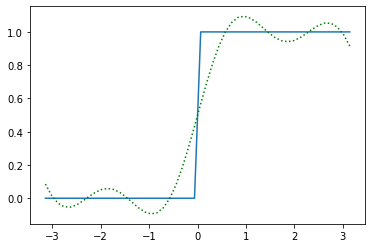

In [2]:
# Make step function data
xdata = np.linspace(-np.pi, np.pi)
ydata = np.zeros_like(xdata)
ydata[xdata > 0] = 1
# Define a Fit object for this model and data
fit = Fit(model_dict, x=xdata, y=ydata)
fit_result = fit.execute()
print(fit_result)

# Plot the result
plt.plot(xdata, ydata)
plt.plot(xdata, fit.model(x=xdata, **fit_result.params).y, color='green', ls=':')